In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter

In [2]:
data = 'EmployeeAttrition.csv'
employee_df = pd.read_csv(data)

In [3]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
employee_df.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
employee_df[employee_df.isnull()].count()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
employee_df.replace('No', 0, inplace=True)
employee_df.replace('Yes', 1, inplace=True)
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# Dropping unnecessary cols , and creating a new col

employee_df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)
employee_df.insert(loc=0, column='EmployeeID', value=np.arange(len(employee_df)))

In [10]:
current_year = 2020

employee_df['Year_Start_Company'] = current_year - employee_df.YearsAtCompany
employee_df['Year_Start_Role'] = current_year - employee_df.YearsInCurrentRole
employee_df['Year_Last_Promotion'] = current_year - employee_df.YearsSinceLastPromotion

employee_df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Year_Start_Company,Year_Start_Role,Year_Last_Promotion
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,8,0,1,6,4,0,5,2014,2016,2020
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,10,3,3,10,7,1,7,2010,2013,2019
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,7,3,3,0,0,0,0,2020,2020,2020
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,8,3,3,8,7,3,0,2012,2013,2017
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,6,3,3,2,2,2,2,2018,2018,2018


<AxesSubplot:xlabel='Year_Start_Company', ylabel='Count'>

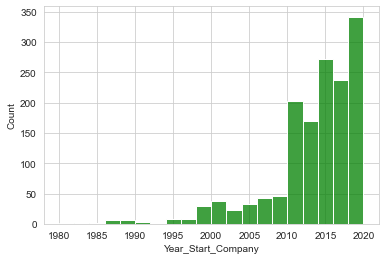

In [11]:
# Looking at frequency of when employees joined the company

sns.set_style('whitegrid')
sns.histplot(employee_df['Year_Start_Company'], kde = False, color ='green', bins = 20)

<AxesSubplot:xlabel='Year_Start_Role', ylabel='Count'>

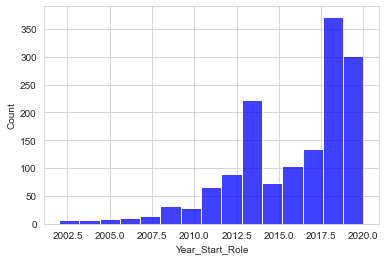

In [12]:
# Distribution of when employees started their current roles

sns.set_style('whitegrid')
sns.histplot(employee_df['Year_Start_Role'], kde = False, color ='blue', bins = 15)

<AxesSubplot:xlabel='Year_Last_Promotion', ylabel='Count'>

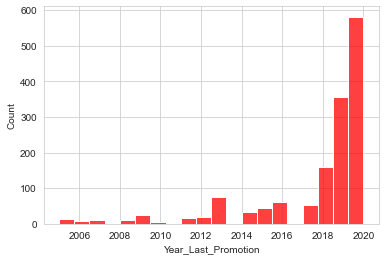

In [13]:
# Distribution of when employees were last promoted

sns.set_style('whitegrid')
sns.histplot(employee_df['Year_Last_Promotion'], kde = False, color ='red', bins = 20)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

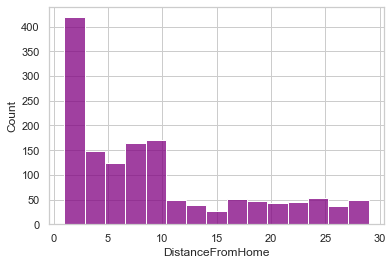

In [36]:
sns.set_style('whitegrid')
sns.histplot(employee_df['DistanceFromHome'], kde = False, color ='purple', bins = 15)

In [14]:
retained = employee_df[employee_df['Attrition'] == 0]
gone = employee_df[employee_df['Attrition'] == 1]

print('Retained: {:d}, Gone: {:d}'.format(len(retained), len(gone)))

Retained: 1233, Gone: 237


In [15]:
# Looking at the percentage breakdown of employee attrition 

employee_df["Attrition"].value_counts()/employee_df.shape[0]

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [16]:
employee_df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [17]:
# Attrition Rate by Department

pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.Department],margins=True,normalize='index')

Attrition,0,1
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


<AxesSubplot:xlabel='Department'>

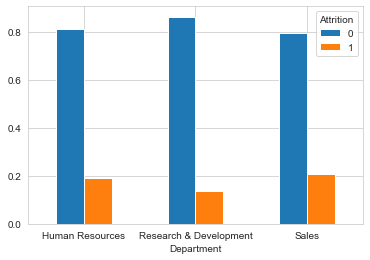

In [18]:
pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.Department],normalize='index').plot.bar(stacked=False, rot=0)

Department segments tend to follow company wide attrition rate, with Sales Dept being slightly higher

In [19]:
# Attrition Rate by Job Level

pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.JobLevel],margins=True,normalize='index')

Attrition,0,1
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


<AxesSubplot:xlabel='JobLevel'>

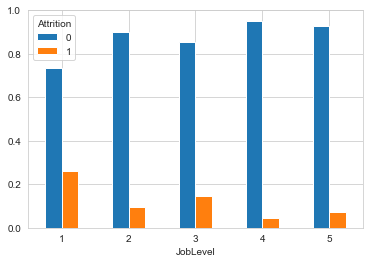

In [20]:
pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.JobLevel],normalize='index') \
    .plot.bar(stacked=False, rot=0)

Fairly unsurprising, more senior level roles have lower rates of attrition. Low level jobs have the highest turnover and there is a slight bump at 3 years which could be interesting to look at further. The 3 year point may be a common length of time in which an employee may consider leaving

In [21]:
# Attrition Rate by Travel

pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.BusinessTravel],margins=True,normalize='index')

Attrition,0,1
BusinessTravel,,
Non-Travel,0.920000,0.080000
Travel_Frequently,0.750903,0.249097
Travel_Rarely,0.850431,0.149569
All,0.838776,0.161224


<AxesSubplot:xlabel='BusinessTravel'>

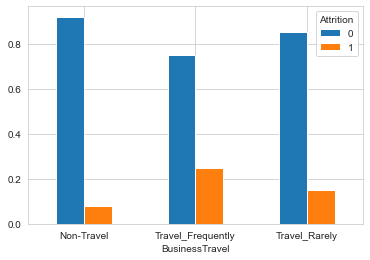

In [22]:
pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.BusinessTravel],normalize='index').plot.bar(stacked=False, rot=0)

Employees who travel more tend to leave in higher numbers

In [23]:
# Are stocks an incentive to stay?

pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.StockOptionLevel],margins=True,normalize='index')

Attrition,0,1
StockOptionLevel,,
0,0.755943,0.244057
1,0.906040,0.093960
2,0.924051,0.075949
3,0.823529,0.176471
All,0.838776,0.161224


<AxesSubplot:xlabel='StockOptionLevel'>

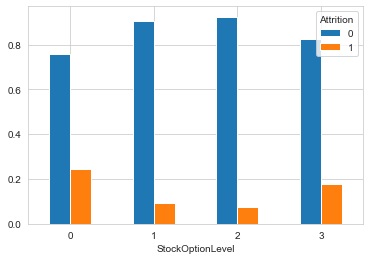

In [24]:
pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.StockOptionLevel],normalize='index').plot.bar(stacked=False, rot=0)

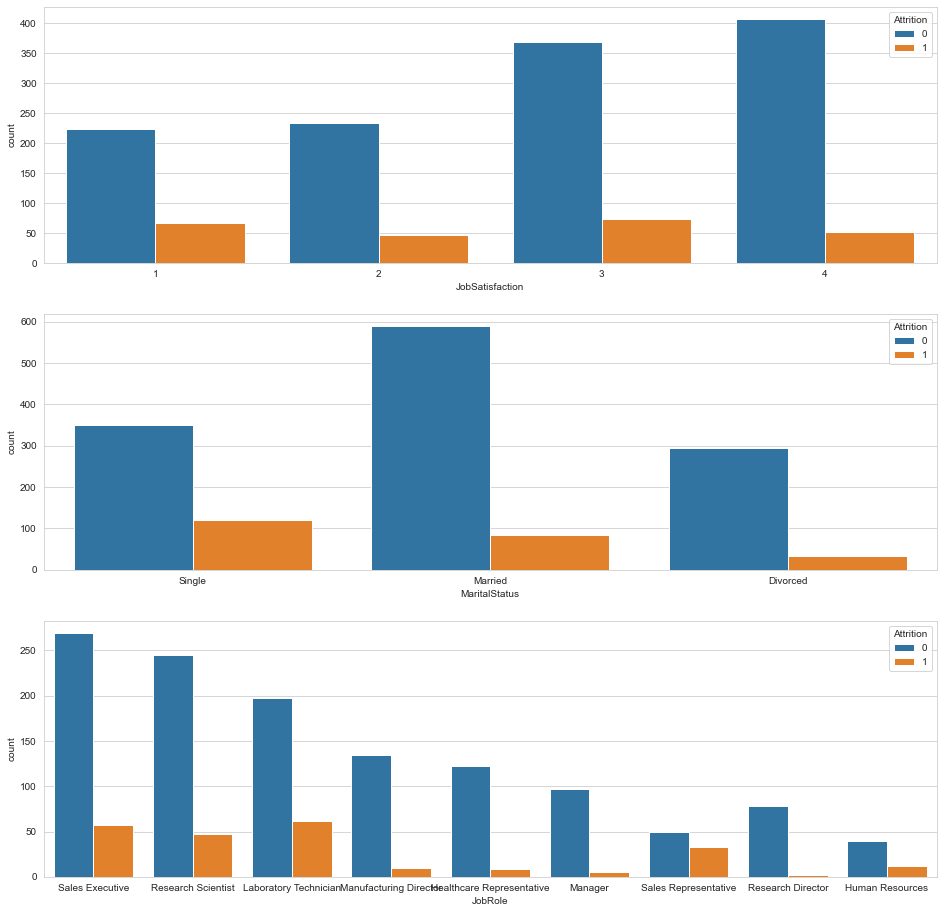

In [25]:
plt.figure(figsize=[16,16])

plt.subplot(311)
sns.countplot(x=employee_df['JobSatisfaction'],hue=employee_df['Attrition'])
plt.subplot(312)
sns.countplot(x=employee_df['MaritalStatus'],hue=employee_df['Attrition'])
plt.subplot(313)
sns.countplot(x=employee_df['JobRole'],hue=employee_df['Attrition'])

plt.show()

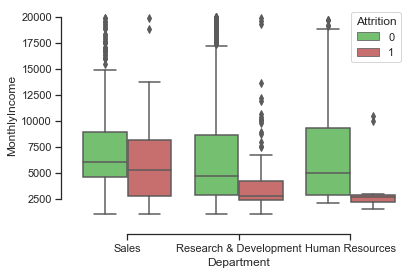

In [35]:
# Draw a nested boxplot to show MonthlyIncome by Departments

sns.set_theme(style="ticks", palette="muted")
sns.boxplot(x="Department", y="MonthlyIncome",
            hue="Attrition", palette=["g", "r"],
            data=employee_df)
sns.despine(offset=10, trim=True)

In [40]:
# Male and Female employees at Job Level 1 or 2

lowlevel_male = employee_df[employee_df['JobLevel'].isin([1,2]) & (employee_df.Gender == 'Male') & (employee_df.Attrition == 1)]
lowlevel_female = employee_df[employee_df['JobLevel'].isin([1,2]) & (employee_df.Gender == 'Female') & (employee_df.Attrition == 1)]                

In [42]:
lowlevel_male.value_counts().sum()

124

In [44]:
lowlevel_female.value_counts().sum()

71

In [46]:
# Male and Female employees at Job Level 3,4,5

upperlevel_male = employee_df[employee_df['JobLevel'].isin([3,4,5]) & (employee_df.Gender == 'Male') & (employee_df.Attrition == 1)]
upperlevel_female = employee_df[employee_df['JobLevel'].isin([3,4,5]) & (employee_df.Gender == 'Female') & (employee_df.Attrition == 1)]                

In [47]:
upperlevel_male.value_counts().sum()

26

In [48]:
upperlevel_female.value_counts().sum()

16

-----

## Kaplan-Meier Survival Analysis

Simple test case. Two cohorts --> 

1) 'Low Level' Males \
2) 'Low Level' Females 

Low-Level defined as either a 1 or 2 in the JobLevel column